In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
from time import time as time
t0 = time()
nfiles = 50
ns_per_sample = 25
window_min = 100
window_max = 500
dwindow = 5

In [3]:
runno = '7487'
Ecut = (200, 600)
nwindow = int((window_min - window_max) / dwindow)

In [40]:
def gauss(x, A, m, s):
    return A*np.exp(-(x-m)**2 / (2*s**2))

from scipy.optimize import curve_fit

def const(x, a):
    return a + 0*x

def exp_dt(sig):
    """
    expected drift distance  as a function of sigma of the S2 signal (Zrms from kdst 2018 version)
    parameters from the ad-hoc fit
    """
    p = [-10.00667732,  52.1855012,   12.68195726,  58.66322846, -20.11819297]
    dt = p[0] * sig**4 + p[1] * sig**3 + p[2]*sig**2 + p[3]*sig + p[4]
    return dt

In [5]:
# indir = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_'+runno+'_all/'
# all_files = [indir+file for file in os.listdir(indir)][:nfiles]

In [6]:
jsondir = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_'+runno+'_json/'
if nfiles > 0:
    all_jsons = [jsondir+file for file in os.listdir(jsondir)][:nfiles]
else:
    all_jsons = [jsondir+file for file in os.listdir(jsondir)]

In [7]:
all_data = {}

In [8]:
all_data = {
    'events_window_maxX' : [],
    'events_window_maxY' : [],
    'events_window_rms' : [],
    'events_window_width' : [],
    'events_window_energy' : [],
    'events_window_charge' : [],
    'events_window_Zrms' : [],
    'events_window_Zgauss' : [],
    'events_sumwf' : [],
    'events_times' : [],
    'event_numbers' : []
}

n = 0
for filename in all_jsons:
    if n % 10 == 0:
        remaining = (len(all_jsons) - n)*(time() - t0) / (n + 1)
        print(n, '...', round(time() - t0, 1), '; Remaining ~=', round(remaining,1))
    n += 1
    f = open(filename)
    new_dict = json.load(f)
    f.close()
    for k in new_dict.keys():
        all_data[k].extend(new_dict[k])

0 ... 4.5 ; Remaining ~= 224.4
10 ... 5.8 ; Remaining ~= 21.1
20 ... 7.1 ; Remaining ~= 10.2
30 ... 8.6 ; Remaining ~= 5.6
40 ... 10.0 ; Remaining ~= 2.4


In [9]:
events_window_maxX = np.array(all_data['events_window_maxX'])
events_window_maxY = np.array(all_data['events_window_maxY'])
events_window_rms = np.array(all_data['events_window_rms'])
events_window_width = np.array(all_data['events_window_maxX'])
events_window_energy = np.array(all_data['events_window_energy'])
events_window_charge = np.array(all_data['events_window_charge'])
events_window_Zrms = np.array(all_data['events_window_Zrms'])
events_window_Zgauss = np.array(all_data['events_window_Zgauss'])
events_sumwf = np.array(all_data['events_sumwf'])
events_times = np.array(all_data['events_times'])

In [10]:
# n_total = len(all_files)
# n = 0
# for filename in all_files:

#     print('Time =', round(time() - t0, 1))
#     t0 = time()
    
#     n += 1
#     print(n, '/', n_total)

#     infile = open(filename, 'r')
    
#     data = infile.read()
#     infile.close()
    
#     events_window_maxX.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
#     data = data[data.find(']]')+3:]
#     print('Got maxX. Next item:', data[:25])
    
#     events_window_maxY.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
#     data = data[data.find(']]')+3:]
#     print('Got maxY. Next item:', data[:25])
    
#     events_window_rms.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
#     data = data[data.find(']]')+3:]
#     print('Got rms. Next item:', data[:25])

#     events_window_width.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
#     data = data[data.find(']]')+3:]
#     print('Got width. Next item:', data[:25])

#     events_window_energy.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
#     data = data[data.find(']]')+3:]
#     print('Got energy. Next item:', data[:25])

#     events_window_charge.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
#     data = data[data.find(']]')+3:]
#     print('Got charge. Next item:', data[:25])

#     events_window_Zrms.extend(eval(data[data.find('=')+1:data.find(']]')+2]))
#     data = data[data.find(']]')+3:]
#     print('Got Zrms. Next item:', data[:25])

#     sum_wf_all = eval(data[data.find('=')+1:data.find(']]')+2].replace('array', 'np.array'))
#     sumwf_last = [ sum_wfs[-1] for sum_wfs in sum_wf_all ]
    
#     events_sumwf.extend(sumwf_last)
#     data = data[data.find(']]')+3:]
#     print('Got sumwf. Next item:', data[:25])

#     times_all = eval(data[data.find('=')+1:data.find(']]')+2].replace('array', 'np.array'))
#     times_last = [ times[-1] for times in times_all ]
    
#     events_times.extend(times_last)
#     data = data[data.find(']]')+3:]
#     print('Got times. Next item:', data[:25])

In [11]:
# events_window_Zrms_single = np.array([ max(z) for z in np.array(events_window_Zrms) ])
# events_window_Zgauss_single = np.array([ max(z) for z in np.array(events_window_Zgauss) ])

# events_Zgauss = []
# maxshow = 100
# shown = 0

# for ievt in range(len(events_window_Zrms)):
#     E = events_window_energy[ievt][-1]
    
#     if E > 100:
        
#         Zrms = 
#         try:
#             mean0 = np.mean(events_times[ievt])
#             amp0 = np.max(events_sumwf[ievt])
#             stdev0 = 5000

#             xdata = events_times[ievt]
#             ydata = events_sumwf[ievt]
#             popt, pcov = curve_fit(gauss, xdata, ydata, p0 = (amp0, mean0, stdev0))
#             amp, mean, stdev = popt

#             Z = exp_dt(stdev/1000)
#             Zrms = events_window_Zrms_single[ievt]

#             if abs(Z - Zrms) > 100:
#                 print('Z, Zrms =', Z, ',', Zrms)
#                 fitdata = gauss(xdata, *popt)
#                 plt.plot(xdata, ydata)
#                 plt.plot(xdata, fitdata, '--', color='r')
#                 plt.show()
#                 shown += 1
#         #except:
#         #    Z = -1
        
#     else:
        
#         Z = -1
        
#     events_Zgauss.append(Z)
    
# events_Zgauss = np.array(events_Zgauss)


In [12]:
print(len(events_window_maxX))
print(len(events_window_maxY))
print(len(events_window_rms))
print(len(events_window_width))
print(len(events_window_energy))
print(len(events_window_charge))
print(len(events_window_Zrms))
print(len(events_sumwf))
print(len(events_times))
print('-------------')
print(len(events_window_maxX[0]))
print(len(events_window_maxY[0]))
print(len(events_window_rms[0]))
print(len(events_window_width[0]))
print(len(events_window_energy[0]))
print(len(events_window_charge[0]))
print(len(events_window_Zrms[0]))
print(len(events_sumwf[0]))
print(len(events_times[0]))

16620
16620
16620
16620
16620
16620
16620
16620
16620
-------------
80
80
80
80
80
80
80
25
25


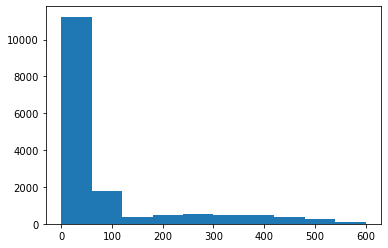

In [13]:
events_energy = np.array([ events_window_energy[e][-1] for e in range(len(events_window_energy)) ])

emax = Ecut[1]
plt.hist(events_energy, bins = 10, range = (0, emax))
plt.show()

In [14]:
events_window_cut_samples = np.arange(window_min, window_max, dwindow)
print(events_window_cut_samples)
events_window_cut = events_window_cut_samples * ns_per_sample * 2
print(events_window_cut)

[100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180 185
 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265 270 275
 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355 360 365
 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445 450 455
 460 465 470 475 480 485 490 495]
[ 5000  5250  5500  5750  6000  6250  6500  6750  7000  7250  7500  7750
  8000  8250  8500  8750  9000  9250  9500  9750 10000 10250 10500 10750
 11000 11250 11500 11750 12000 12250 12500 12750 13000 13250 13500 13750
 14000 14250 14500 14750 15000 15250 15500 15750 16000 16250 16500 16750
 17000 17250 17500 17750 18000 18250 18500 18750 19000 19250 19500 19750
 20000 20250 20500 20750 21000 21250 21500 21750 22000 22250 22500 22750
 23000 23250 23500 23750 24000 24250 24500 24750]


In [15]:
events_window_energy_norm = np.array([ [ peak / max(max(window_energy), 0.1) for peak in window_energy ] for window_energy in events_window_energy ])

In [16]:
Emask = (events_energy > Ecut[0]) & (events_energy < Ecut[1])

In [42]:
# Get the Zgauss values by finding the flat line in the Zgauss vs window
all_Zgauss = []
nasty_events = []

maxshow = 10
shown = 0
for ievt in range(len(events_window_Zgauss)):    
    
    nasty = False
    
    try:

        # First iteration of fit

        xdata = events_window_cut[events_window_Zgauss[ievt] > exp_dt(0)]
        ydata = events_window_Zgauss[ievt][events_window_Zgauss[ievt] > exp_dt(0)]
        popt, pcov = curve_fit(const, xdata, ydata, p0 = np.mean(ydata))

        fitdata = const(xdata, *popt)
        stdev = np.std(ydata)
        errors = (fitdata - stdev, fitdata + stdev)

        stdev_mask = (ydata > errors[0]) & (ydata < errors[1])

        # Second iteration of fit, without outliers

        xdata2 = xdata[stdev_mask]
        ydata2 = ydata[stdev_mask]
        popt, pcov = curve_fit(const, xdata2, ydata2, p0 = np.mean(ydata))

        fitdata2 = const(xdata2, *popt)
        stdev2 = np.std(ydata2)
        errors2 = (fitdata2 - stdev2, fitdata2 + stdev2)

        Zgauss = popt[0]
        all_Zgauss.append(Zgauss)
        
    except:
        
        Zgauss = 0
        all_Zgauss.append(Zgauss)
        nasty = True
        
        if Emask[ievt]:
            print('You might have an issue with event', ievt, ': it is big, but cannot fit a Z value.')
            nasty_events.append(ievt)
    
    if shown < maxshow and nasty and Emask[ievt]:
        shown += 1
    
        print('################')
        print('EVT    =', ievt)
        print('ENERGY =', events_energy[ievt])
        print('ZGAUSS =', Zgauss)
        print('################')
    
        # Plot waveform
        
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
        plt.grid(True)
        plt.show()
        
        # Plot window width vs Zgauss

        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zgauss (mm)')
        plt.plot(events_window_cut, events_window_Zgauss[ievt], color='b')

        # plt.plot(xdata, fitdata, '--', color='r')
        # plt.plot(xdata, errors[0], '-.', color='y')
        # plt.plot(xdata, errors[1], '-.', color='y')

        plt.grid(True)
        plt.show()

        
        # Plot second window width vs Zgauss
#         plt.xlabel('Window width (ns)')
#         plt.ylabel('Estimated Zgauss (mm)')
#         plt.plot(events_window_cut, events_window_Zgauss[ievt], color='b')

#         plt.plot(xdata2, fitdata2, '--', color='r')
#         plt.plot(xdata2, errors2[0], '-.', color='y')
#         plt.plot(xdata2, errors2[1], '-.', color='y')

#         plt.grid(True)
#         plt.show()

all_Zgauss = np.array(all_Zgauss)

In [43]:
all_energy_cutoffs_999 = np.array([2 * (window_min + dwindow * np.argmax(window_energy_norm > 0.999)) * ns_per_sample for window_energy_norm in events_window_energy_norm])
all_energy_cutoffs_99 = np.array([2 * (window_min + dwindow * np.argmax(window_energy_norm > 0.99)) * ns_per_sample for window_energy_norm in events_window_energy_norm])
all_Zrms = np.array([ np.max(window_Zrms) for window_Zrms in events_window_Zrms ])

maxshow = 0
shown = 0
for i_evt in range(len(events_window_energy_norm)):
        
    if shown < maxshow:

        X = events_window_maxX[i_evt][-1]
        Y = events_window_maxY[i_evt][-1]
        E = round(max(events_window_energy[i_evt]), 1)
        
        shown += 1

        print('##############')
        print('EVENT NUMBER', i_evt)
        print('##############')

        # Plot the waveform
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the waveform, log scale
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.yscale('log')
        plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the energy vs window width
        normed = np.array(events_window_energy_norm[i_evt])
        normed = 1 - normed
        plt.ylim(10**-5,10**0)
        plt.yscale('log')
        plt.title(str(i_evt)+'. X, Y = '+str(X)+', '+str(Y)+', E = '+str(E))
        plt.xlabel('Window width (ns)')
        plt.ylabel('1 - event energy (normalized)')
        plt.grid(True)
        plt.plot(events_window_cut, normed)
        plt.show()

        # Plot the increase for including 5 more us
        windows_in_5_us = int((5000 / ns_per_sample) / (2 * dwindow))
        change_next_five_us = np.array(events_window_energy_norm[i_evt][windows_in_5_us:]) - np.array(events_window_energy_norm[i_evt][:-windows_in_5_us])    
        plt.xlabel('Current window size')
        plt.ylabel('Increase in energy for adding 5 us')
        plt.yscale('log')
        plt.plot(events_window_cut[:-windows_in_5_us], change_next_five_us)
        plt.grid(True)
        plt.show()

        # Plot the Zrms estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zrms (mm)')
        plt.plot(events_window_cut, events_window_Zrms[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the Zgauss estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zgauss (mm)')
        plt.plot(events_window_cut, events_window_Zgauss[i_evt])
        plt.grid(True)
        plt.show()

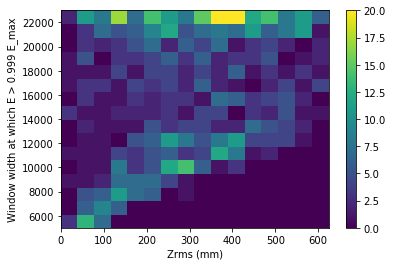

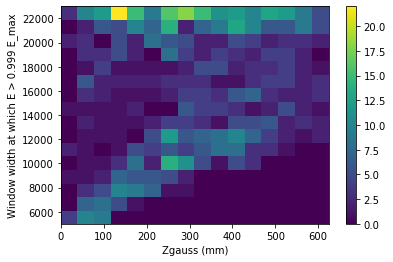

In [44]:
window_range = (5000, 23000)
bins = (16, 16)
zrange = (0, 625)

hrms = plt.hist2d(all_Zrms[Emask], all_energy_cutoffs_999[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss[Emask], all_energy_cutoffs_999[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hgauss[3])
plt.show()

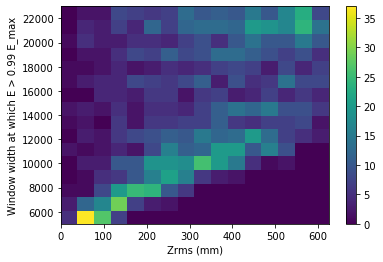

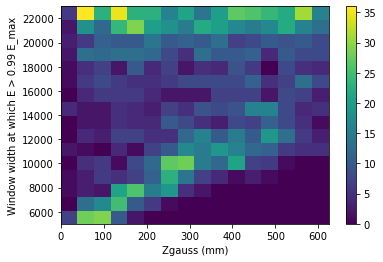

In [45]:
hrms = plt.hist2d(all_Zrms[Emask], all_energy_cutoffs_99[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hgauss[3])
plt.show()

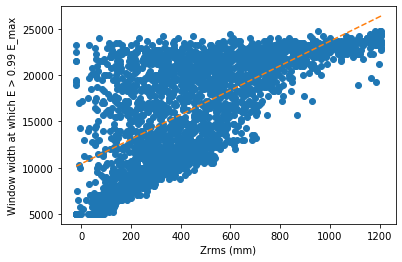

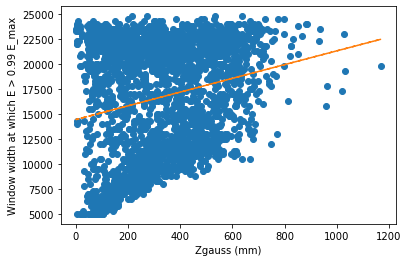

In [46]:
p = np.polyfit(all_Zrms[Emask], all_energy_cutoffs_99[Emask], 1)
line = np.array(all_Zrms)*p[0] + p[1]
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zrms[Emask], all_energy_cutoffs_99[Emask], 'o')
plt.plot(all_Zrms, line, '--')
plt.show()

good_gauss = (all_Zgauss > 0) & Emask
p = np.polyfit(all_Zgauss[good_gauss], all_energy_cutoffs_99[good_gauss], 1)
line = np.array(all_Zgauss[good_gauss])*p[0] + p[1]
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zgauss[good_gauss], all_energy_cutoffs_99[good_gauss], 'o')
plt.plot(all_Zgauss[good_gauss], line, '--')
plt.show()

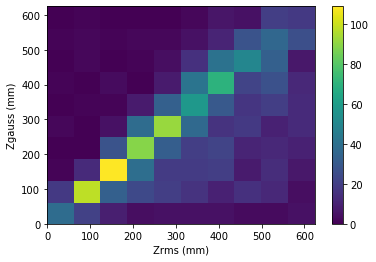

In [47]:
hZ = plt.hist2d(all_Zrms[Emask], all_Zgauss[Emask], range = (zrange, zrange))
plt.xlabel('Zrms (mm)')
plt.ylabel('Zgauss (mm)')
plt.colorbar(hZ[3])
plt.show()

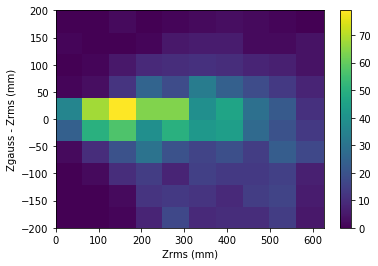

In [48]:
all_dZ = np.array(all_Zgauss[Emask]) - np.array(all_Zrms[Emask])
dzrange = (-200, 200)
hdZ = plt.hist2d(all_Zrms[Emask], all_dZ, range = (zrange, dzrange))
plt.xlabel('Zrms (mm)')
plt.ylabel('Zgauss - Zrms (mm)')
plt.colorbar(hdZ[3])
plt.show()

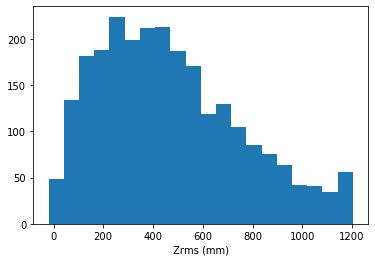

In [49]:
plt.hist(all_Zrms[Emask], bins = 20)
plt.xlabel('Zrms (mm)')
plt.show()

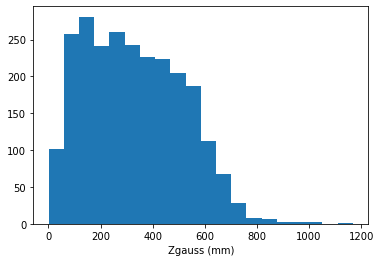

In [50]:
plt.hist(all_Zgauss[good_gauss & Emask], bins = 20)
plt.xlabel('Zgauss (mm)')
plt.show()

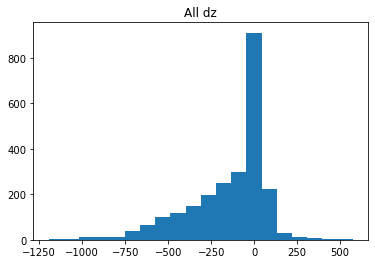

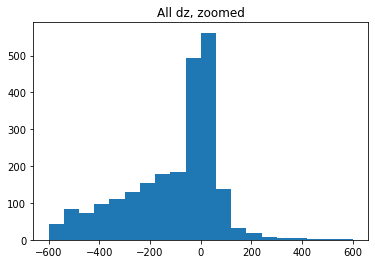

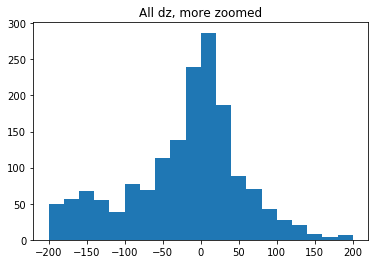

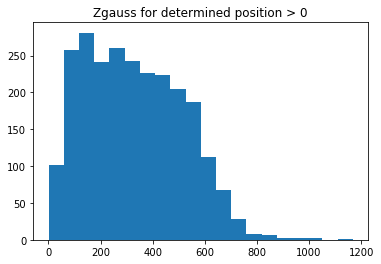

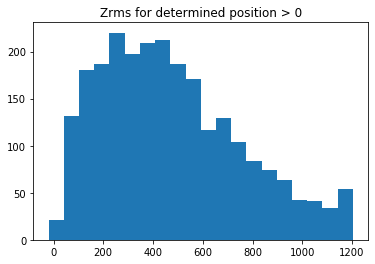

In [51]:
Zmask = (all_Zgauss > 0) & Emask
dZ = all_Zgauss[Zmask] - all_Zrms[Zmask]

plt.hist(dZ, bins = 20)
plt.title('All dz')
plt.show()

plt.hist(dZ, bins = 20, range = (-600, 600))
plt.title('All dz, zoomed')
plt.show()

plt.hist(dZ, bins = 20, range = (-200, 200))
plt.title('All dz, more zoomed')
plt.show()

plt.hist(all_Zgauss[Zmask], bins = 20)
plt.title('Zgauss for determined position > 0')
plt.show()

plt.hist(all_Zrms[Zmask], bins = 20)
plt.title('Zrms for determined position > 0')
plt.show()

In [52]:
print('Too many events exactly at 859.26120583')

Too many events exactly at 859.26120583


In [53]:
evt_ids = np.array(list(range(len(all_Zgauss))))

In [54]:
weird_event_mask = (all_Zgauss > 850) & (all_Zgauss < 860) & Emask
selected_evts = evt_ids[weird_event_mask]
print(selected_evts[:10])

[4448 9865]


###################
EVENT NUMBER 4448
Energy     = 508.73076587924066
###################


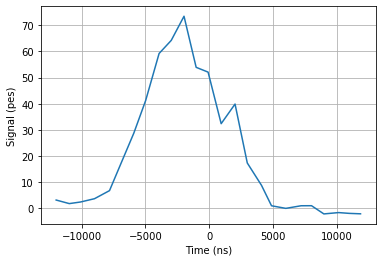

###################
EVENT NUMBER 9865
Energy     = 274.81970184972715
###################


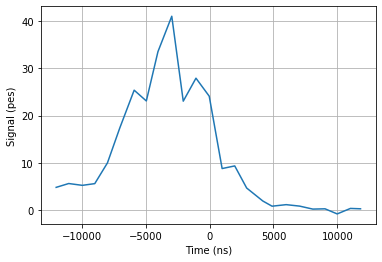

In [55]:
for ievt in selected_evts[:10]:
    print('###################')
    print('EVENT NUMBER', ievt)
    print('Energy     =', events_energy[ievt])
    print('###################')

    # Plot the waveform
    plt.xlabel('Time (ns)')
    plt.ylabel('Signal (pes)')
    plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
    plt.grid(True)
    plt.show()